In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:

data = pd.read_csv(r'C:\Users\ZED\Desktop\Lijith\titanic_dataset.csv')

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the NULL values 

In [47]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

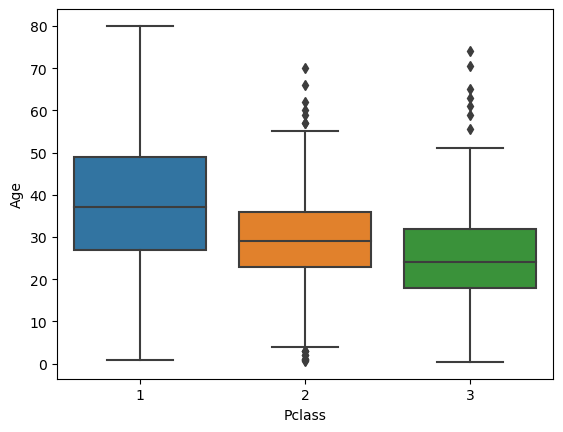

In [48]:
sns.boxplot(x='Pclass',y='Age',data= data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

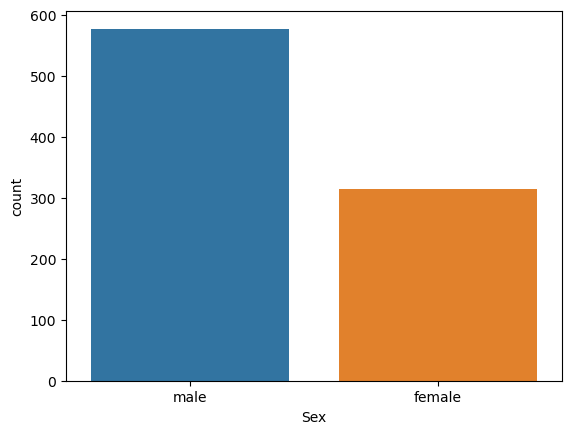

In [49]:
sns.countplot(x='Sex',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

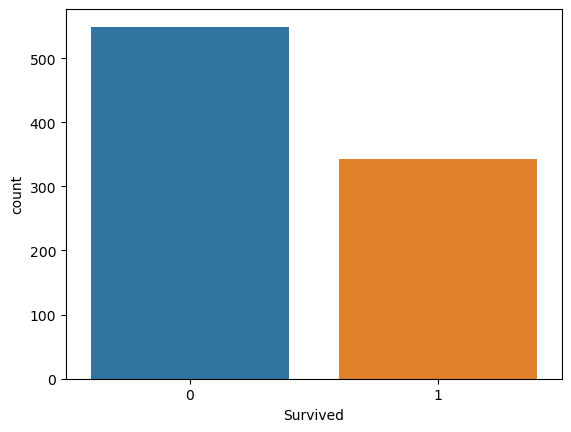

In [50]:
sns.countplot(x='Survived',data=data)

Text(0.5, 1.0, 'data1.corr()')

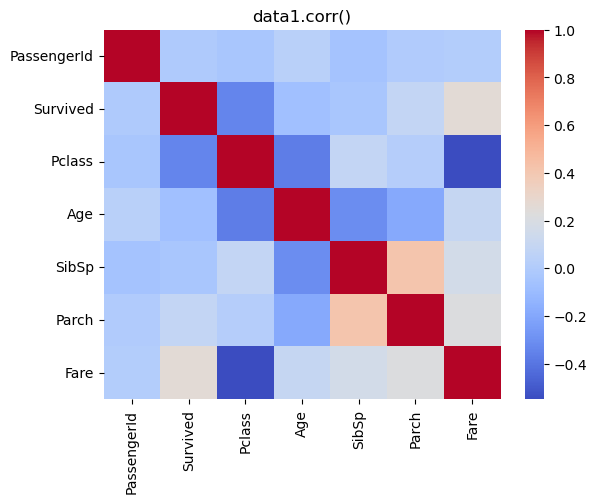

In [51]:
tc = data.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('data1.corr()')

C:\Users\ZED\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZED\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


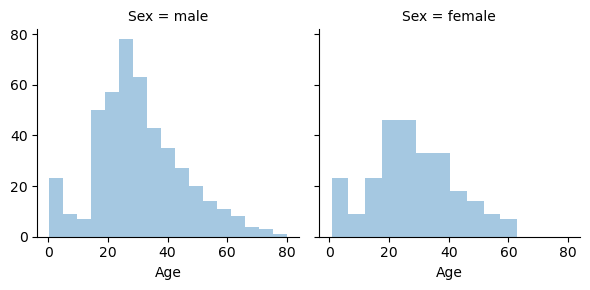

In [53]:
g = sns.FacetGrid(data=data, col='Sex')
g.map(sns.distplot, 'Age',kde=False)

In [54]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [58]:
data = data.fillna(method = 'pad')

In [59]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [60]:
data=pd.get_dummies(data)

In [61]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [62]:
#Split the data set into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
metric_k=[]
neighbors = np.arange(3,15)

In [66]:
   for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric= 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\ZED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ZED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

In [67]:
metric_k

[0.7094972067039106,
 0.6871508379888268,
 0.6871508379888268,
 0.6927374301675978,
 0.6871508379888268,
 0.6927374301675978,
 0.7206703910614525,
 0.6815642458100558,
 0.6815642458100558,
 0.6759776536312849,
 0.6759776536312849,
 0.6759776536312849]

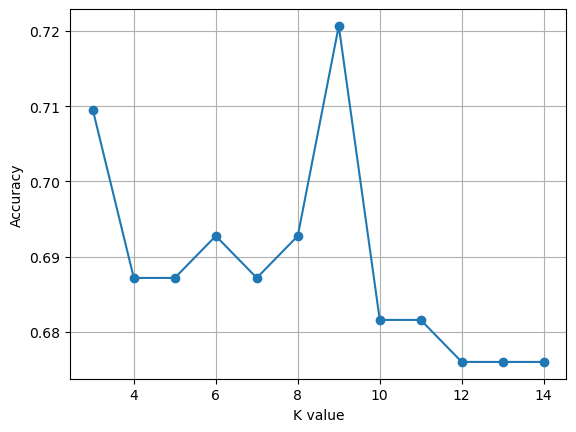

In [68]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [70]:
classifier = KNeighborsClassifier(n_neighbors=9, metric= 'euclidean')
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)

C:\Users\ZED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
accuracy_score(y_test,y_pred_knn)

0.7206703910614525

In [72]:
#Another way to find Accuracy
KNN_Model=classifier.fit(x_train,y_train)

In [73]:
Score_KNN = KNN_Model.score(x_test,y_test)

C:\Users\ZED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [74]:
Score_KNN

0.7206703910614525

In [76]:
from sklearn.model_selection import KFold
kfold_validator = KFold(11)

In [77]:
for train_index, test_index in kfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Validation Index: ',test_index)

Training Index:  [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 3

In [78]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(KNN_Model,x,y,cv= kfold_validator)

C:\Users\ZED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ZED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

In [79]:
cv_result

array([0.60493827, 0.60493827, 0.69135802, 0.67901235, 0.71604938,
       0.69135802, 0.71604938, 0.71604938, 0.74074074, 0.77777778,
       0.75308642])

In [80]:
#take average accuracy
np.mean(cv_result)

0.6992143658810325

In [81]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits = 10)

In [82]:
skcv_result = cross_val_score(KNN_Model,x,y,cv= skfold_validator)

C:\Users\ZED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ZED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

In [83]:
#take average accuracy
np.mean(skcv_result)

0.6858302122347066

SVM

In [84]:
from sklearn.svm import SVC

In [85]:
svm_clf = SVC(kernel='rbf')

In [86]:
SVM_Model=svm_clf.fit(x_train,y_train)

In [87]:
SVM_Model

SVC()

In [88]:
y_pred = svm_clf.predict(x_test)

In [89]:
accuracy_score(y_test,y_pred)

0.6536312849162011

In [90]:
Score_SVM = SVM_Model.score(x_test,y_test)

In [91]:
Score_SVM

0.6536312849162011

In [95]:
#take average accuracy
np.mean(kf_result)

0.67003367003367

In [99]:
skf_result = cross_val_score(SVM_Model,x,y,cv= skfold_validator)

In [100]:
skf_result

array([0.62222222, 0.57303371, 0.6741573 , 0.74157303, 0.68539326,
       0.68539326, 0.68539326, 0.69662921, 0.69662921, 0.6741573 ])

In [101]:
#take average accuracy
np.mean(skf_result)

0.6734581772784021